In [2]:
import yfinance as yf 
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import clear_output
import random
import warnings
warnings.filterwarnings('ignore')

# Get returns and covariance matrix from excel file
## Clean data to include relevant ETFs only

In [3]:
data = pd.read_excel(r'C:\Users\Jared Reimer\Documents\School Work\YR3\Y3S2\FI 351\FTS_ETF_Cut.xlsx')
clean_data = data.nlargest(int(len(data['Expected Return'])/3), 'Expected Return')
select_etfs = ['Ticker', 'Name', 'Expected Return']
selected = clean_data['Name'].to_list()
select_etfs.extend(selected)
clean_data = clean_data[select_etfs]

ticker_list = clean_data['Ticker'].to_list()
returns = clean_data['Expected Return']

In [4]:
clean_data

,Ticker,Name,Expected Return,Invesco Golden Dragon China ETF,iShares MSCI South Africa ETF,SPDR S&P China ETF,iShares China Large-Cap ETF,iShares MSCI Indonesia ETF,VanEck Vectors Indonesia Index ETF,iShares MSCI South Korea ETF,VanEck Vectors Vietnam ETF,iShares MSCI Taiwan ETF,iShares MSCI Turkey ETF,iShares MSCI Israel Capped ETF,iShares MSCI Sweden Capped ETF,iShares MSCI Germany ETF,iShares Latin America 40 ETF,iShares MSCI Brazil Capped ETF
41,PGJ,Invesco Golden Dragon China ETF,0.0824,0.0651,0.0234,0.0207,0.0180,0.0177,0.0176,0.0175,0.0171,0.0170,0.0169,0.0169,0.0164,0.0161,0.0162,0.0161
33,EZA,iShares MSCI South Africa ETF,0.0791,0.0234,0.0515,0.0196,0.0171,0.0168,0.0167,0.0166,0.0162,0.0162,0.0161,0.0160,0.0155,0.0153,0.0153,0.0153
37,GXC,SPDR S&P China ETF,0.0719,0.0207,0.0196,0.0350,0.0151,0.0148,0.0147,0.0147,0.0143,0.0143,0.0142,0.0141,0.0137,0.0135,0.0136,0.0135
34,FXI,iShares China Large-Cap ETF,0.0649,0.0180,0.0171,0.0151,0.0290,0.0130,0.0129,0.0128,0.0125,0.0125,0.0124,0.0124,0.0120,0.0118,0.0118,0.0118
5,EIDO,iShares MSCI Indonesia ETF,0.0640,0.0177,0.0168,0.0148,0.0130,0.0397,0.0126,0.0126,0.0123,0.0122,0.0122,0.0121,0.0118,0.0116,0.0116,0.0116
38,IDX,VanEck Vectors Indonesia Index ETF,0.0636,0.0176,0.0167,0.0147,0.0129,0.0126,0.0320,0.0125,0.0122,0.0121,0.0121,0.0120,0.0117,0.0115,0.0115,0.0115
30,EWY,iShares MSCI South Korea ETF,0.0635,0.0175,0.0166,0.0147,0.0128,0.0126,0.0125,0.0208,0.0121,0.0121,0.0121,0.0120,0.0117,0.0115,0.0115,0.0114
46,VNM,VanEck Vectors Vietnam ETF,0.0623,0.0171,0.0162,0.0143,0.0125,0.0123,0.0122,0.0121,0.0141,0.0118,0.0117,0.0117,0.0113,0.0112,0.0112,0.0111
26,EWT,iShares MSCI Taiwan ETF,0.0622,0.0170,0.0162,0.0143,0.0125,0.0122,0.0121,0.0121,0.0118,0.0168,0.0117,0.0117,0.0113,0.0112,0.0112,0.0111
45,TUR,iShares MSCI Turkey ETF,0.0620,0.0169,0.0161,0.0142,0.0124,0.0122,0.0121,0.0121,0.0117,0.0117,0.0607,0.0116,0.0113,0.0111,0.0111,0.0111


## Separate matrix and set index to properly use

In [5]:
cov_matrix = clean_data.drop(columns=['Ticker', 'Expected Return'])
cov_matrix= cov_matrix.set_index('Name')
cov_matrix

,Invesco Golden Dragon China ETF,iShares MSCI South Africa ETF,SPDR S&P China ETF,iShares China Large-Cap ETF,iShares MSCI Indonesia ETF,VanEck Vectors Indonesia Index ETF,iShares MSCI South Korea ETF,VanEck Vectors Vietnam ETF,iShares MSCI Taiwan ETF,iShares MSCI Turkey ETF,iShares MSCI Israel Capped ETF,iShares MSCI Sweden Capped ETF,iShares MSCI Germany ETF,iShares Latin America 40 ETF,iShares MSCI Brazil Capped ETF
Name,,,,,,,,,,,,,,,
Invesco Golden Dragon China ETF,0.0651,0.0234,0.0207,0.0180,0.0177,0.0176,0.0175,0.0171,0.0170,0.0169,0.0169,0.0164,0.0161,0.0162,0.0161
iShares MSCI South Africa ETF,0.0234,0.0515,0.0196,0.0171,0.0168,0.0167,0.0166,0.0162,0.0162,0.0161,0.0160,0.0155,0.0153,0.0153,0.0153
SPDR S&P China ETF,0.0207,0.0196,0.0350,0.0151,0.0148,0.0147,0.0147,0.0143,0.0143,0.0142,0.0141,0.0137,0.0135,0.0136,0.0135
iShares China Large-Cap ETF,0.0180,0.0171,0.0151,0.0290,0.0130,0.0129,0.0128,0.0125,0.0125,0.0124,0.0124,0.0120,0.0118,0.0118,0.0118
iShares MSCI Indonesia ETF,0.0177,0.0168,0.0148,0.0130,0.0397,0.0126,0.0126,0.0123,0.0122,0.0122,0.0121,0.0118,0.0116,0.0116,0.0116
VanEck Vectors Indonesia Index ETF,0.0176,0.0167,0.0147,0.0129,0.0126,0.0320,0.0125,0.0122,0.0121,0.0121,0.0120,0.0117,0.0115,0.0115,0.0115
iShares MSCI South Korea ETF,0.0175,0.0166,0.0147,0.0128,0.0126,0.0125,0.0208,0.0121,0.0121,0.0121,0.0120,0.0117,0.0115,0.0115,0.0114
VanEck Vectors Vietnam ETF,0.0171,0.0162,0.0143,0.0125,0.0123,0.0122,0.0121,0.0141,0.0118,0.0117,0.0117,0.0113,0.0112,0.0112,0.0111
iShares MSCI Taiwan ETF,0.0170,0.0162,0.0143,0.0125,0.0122,0.0121,0.0121,0.0118,0.0168,0.0117,0.0117,0.0113,0.0112,0.0112,0.0111


# Make random portfolio creation process

In [6]:
p_ret=[]
p_vol=[]
p_weights = []

num_assets = len(ticker_list)
num_portfolios = 500000

In [ ]:
for single_portfolio in range(num_portfolios):
    clear_output(wait=True)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    rets = np.dot(weights, returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    p_ret.append(rets)
    p_vol.append(volatility)
    p_weights.append(weights)
    print('Total progress:', np.round(single_portfolio/num_portfolios *100, 2), '%')

Total progress: 3.55 %


## Put resulting portfolios and their performance in dataframe

In [6]:
data1 = {'Returns': p_ret, 'Volatility': p_vol}
for counter, symbol in enumerate(ticker_list):
    data1[symbol+ ' Weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data1)

## Get t-bill data to calculate risk free rate for Sharpe Ratio calculations

In [7]:
rf_data = yf.download('^TNX', '2020-04-01', datetime.datetime.now())
#print(rf_data)
rf_returns = rf_data['Adj Close']
rfr = (rf_returns.mean())/100 # divide by 100 to convert to x percent
portfolios['Sharpe']=(portfolios['Returns']-rfr)/portfolios['Volatility']
portfolios.head(3)

[*********************100%***********************]  1 of 1 completed


,Returns,Volatility,PGJ Weight,EZA Weight,GXC Weight,FXI Weight,EIDO Weight,IDX Weight,EWY Weight,VNM Weight,EWT Weight,TUR Weight,EIS Weight,EWD Weight,EWG Weight,ILF Weight,EWZ Weight,Sharpe
0,0.065208,0.123384,0.077234,0.082269,0.028374,0.021551,0.113197,0.108730,0.047436,0.053055,0.089575,0.046654,0.018151,0.087921,0.074472,0.086323,0.065058,0.475006
1,0.065038,0.120612,0.002803,0.111129,0.077797,0.066762,0.075848,0.049951,0.118066,0.141998,0.035868,0.055853,0.101992,0.035237,0.087975,0.023967,0.014756,0.484505
2,0.063389,0.119773,0.054888,0.022988,0.012719,0.001110,0.069748,0.103344,0.061070,0.120198,0.014150,0.111782,0.092970,0.085078,0.076935,0.084695,0.088326,0.474133


## Find portfolio within top 10 Sharpe ratios with most diversification

In [8]:
best_weights = portfolios.nlargest(10, 'Sharpe')
best_weights['P Weight Var'] = best_weights.iloc[:,2:-1].var(axis=1)
diversified = (best_weights[best_weights['P Weight Var']==best_weights['P Weight Var'].min()])
diversified = diversified.iloc[:,:-1]

## Also find portfolios with optimal Sharpe ratio and minimum variance for plotting purposes

In [9]:
sharpe = (portfolios[portfolios['Sharpe']==portfolios['Sharpe'].max()])
min_vol = (portfolios[portfolios['Volatility']==portfolios['Volatility'].min()])
sharpe

,Returns,Volatility,PGJ Weight,EZA Weight,GXC Weight,FXI Weight,EIDO Weight,IDX Weight,EWY Weight,VNM Weight,EWT Weight,TUR Weight,EIS Weight,EWD Weight,EWG Weight,ILF Weight,EWZ Weight,Sharpe
192112,0.063055,0.114382,0.022787,0.002324,0.046183,0.028169,0.034565,0.037802,0.164972,0.130402,0.153064,0.021733,0.158534,0.041243,0.047364,0.06504,0.045818,0.493565


# Plot Efficient Frontier

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
plt.scatter(x=portfolios['Volatility'], y=portfolios['Returns'], c= portfolios['Sharpe'], cmap='YlGnBu', marker='o', s=10, alpha=.3)
plt.colorbar()
plt.scatter(x=sharpe['Volatility'], y=sharpe['Returns'], color= 'r', marker='*', s=200, lw=2., label='Max Sharpe Ratio')
plt.scatter(x=min_vol['Volatility'], y=min_vol['Returns'], color= 'b', marker='D', s=100, lw=1., label='Min Volatility')
plt.scatter(x=diversified['Volatility'], y=diversified['Returns'], color= 'g', marker='*', s=200, lw=2., label='Diversified')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.legend(labelspacing=.8, facecolor='white')

plt.show()


## Create Style dictionary to more clearly show portfolio weightings and performance

In [12]:
div_cols = diversified.columns.to_list()
values = []
for x in range(0, (len(div_cols)-1)):
    values.append('{:.2%}')
values.append('{:.3}')
                  
port_format = dict(zip(div_cols, values))

In [13]:
print('Diversified Portfolio Balance:')
# ADD ROW OF ACTUAL BC FORGOT TO SET SEED ON INITIAL RUN
actual_row = [[.0636, .116, .03, .04, .075, .07, .045, .045, .12, .135, .03, 0, .17, .075, .09, .035, .04, .492]]
temp = pd.DataFrame(actual_row, columns=diversified.columns.to_list())
diversified = pd.concat([temp, diversified], ignore_index=True)
diversified = diversified.iloc[0:1,:]
(diversified.style.format(port_format))

Diversified Portfolio Balance:


,Returns,Volatility,PGJ Weight,EZA Weight,GXC Weight,FXI Weight,EIDO Weight,IDX Weight,EWY Weight,VNM Weight,EWT Weight,TUR Weight,EIS Weight,EWD Weight,EWG Weight,ILF Weight,EWZ Weight,Sharpe
0,6.36%,11.60%,3.00%,4.00%,7.50%,7.00%,4.50%,4.50%,12.00%,13.50%,3.00%,0.00%,17.00%,7.50%,9.00%,3.50%,4.00%,0.492


In [14]:
transposed = diversified.iloc[:,2:-1].T
transposed['Weights'] = transposed
transposed

,0,Weights
PGJ Weight,0.030,0.030
EZA Weight,0.040,0.040
GXC Weight,0.075,0.075
FXI Weight,0.070,0.070
EIDO Weight,0.045,0.045
IDX Weight,0.045,0.045
EWY Weight,0.120,0.120
VNM Weight,0.135,0.135
EWT Weight,0.030,0.030
TUR Weight,0.000,0.000


## Graphics of Portfolio distribution

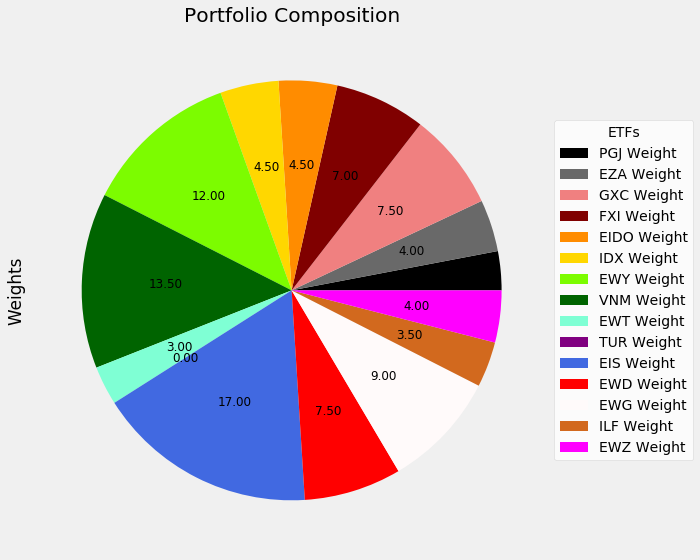

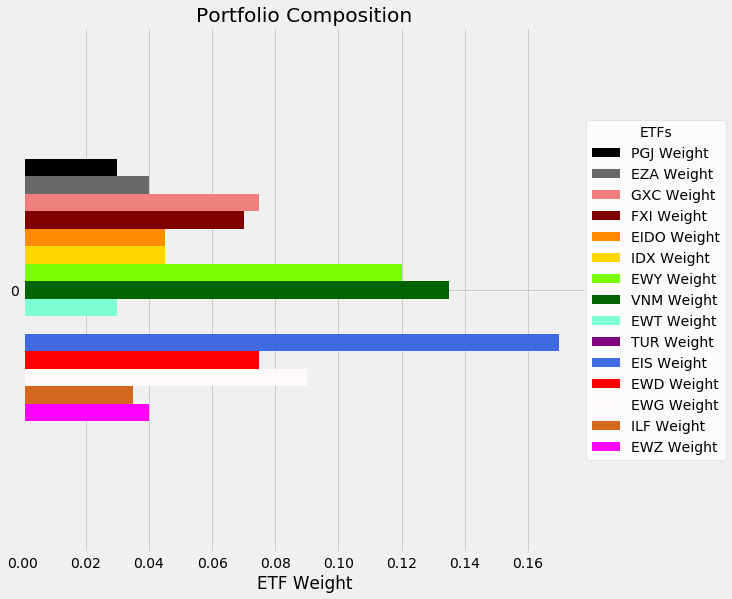

In [15]:
ax1 = transposed.plot.pie(y='Weights', autopct='%.2f', fontsize=12, labels=None, figsize=(9, 9), colors=['k', 'dimgrey', 'lightcoral', 'maroon', 'darkorange',
                                        'gold', 'lawngreen', 'darkgreen', 'aquamarine', 'purple', 'royalblue',
                                        'red', 'snow', 'chocolate', 'magenta' ])
plt.title('Portfolio Composition')
plt.legend(title='ETFs', bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0, facecolor='white', labels=diversified.iloc[:,2:-1].columns.to_list())
ax2 = diversified.iloc[:,2:-1].plot.barh(figsize=(9,9), color=['k', 'dimgrey', 'lightcoral', 'maroon', 'darkorange',
                                        'gold', 'lawngreen', 'darkgreen', 'aquamarine', 'purple', 'royalblue',
                                        'red', 'snow', 'chocolate', 'magenta' ])
plt.legend(title='ETFs', bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0, facecolor='white', labels=diversified.iloc[:,2:-1].columns.to_list())
plt.title('Portfolio Composition')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('ETF Weight')
plt.show()


In [16]:
print('\nMinimum Volatility Portfolio Balance:')
(min_vol.style.format(port_format))


Minimum Volatility Portfolio Balance:


,Returns,Volatility,PGJ Weight,EZA Weight,GXC Weight,FXI Weight,EIDO Weight,IDX Weight,EWY Weight,VNM Weight,EWT Weight,TUR Weight,EIS Weight,EWD Weight,EWG Weight,ILF Weight,EWZ Weight,Sharpe
358285,6.22%,11.36%,1.13%,0.08%,0.28%,4.99%,5.84%,1.42%,11.49%,10.13%,13.39%,4.85%,14.90%,11.65%,10.86%,3.54%,5.46%,0.487


In [17]:
print('\nMaximum Sharpe Ratio Portfolio Balance:')
sharpe.style.format(port_format)


Maximum Sharpe Ratio Portfolio Balance:


,Returns,Volatility,PGJ Weight,EZA Weight,GXC Weight,FXI Weight,EIDO Weight,IDX Weight,EWY Weight,VNM Weight,EWT Weight,TUR Weight,EIS Weight,EWD Weight,EWG Weight,ILF Weight,EWZ Weight,Sharpe
342605,6.30%,11.42%,1.63%,1.50%,3.20%,5.21%,6.49%,5.73%,7.95%,15.07%,13.50%,3.63%,15.99%,1.92%,9.03%,5.50%,3.65%,0.492


# Track Performance against the S&P 500

## Get data from week of holding

In [18]:
start_date = '2020-04-16'
end_date = '2020-07-08'
perf_data = yf.download(ticker_list, start_date, end_date)
perf_prices = perf_data['Adj Close']
perf_prices

[*********************100%***********************]  15 of 15 completed


,EIDO,EIS,EWD,EWG,EWT,EWY,EWZ,EZA,FXI,GXC,IDX,ILF,PGJ,TUR,VNM
Date,,,,,,,,,,,,,,,
2020-04-16,14.555227,46.016350,25.379963,21.898962,35.529999,48.950001,24.390078,29.106831,37.448296,94.618141,13.030000,18.319208,40.517044,19.328302,12.10
2020-04-17,15.515675,46.904541,26.546286,22.799463,36.090000,50.770000,24.933615,29.686413,38.092934,95.543137,13.650000,18.902182,40.527039,20.003700,12.25
2020-04-20,15.060205,47.862591,26.127605,22.443222,35.610001,49.660000,24.627256,29.155949,37.775574,95.403885,13.400000,18.378494,40.596996,19.824919,12.16
2020-04-21,14.575030,46.086208,25.409868,21.938545,34.570000,48.209999,23.816891,28.556719,36.763992,93.076485,12.950000,17.775759,39.727493,19.358099,11.69
2020-04-22,15.040401,47.393547,26.067795,22.205727,35.139999,49.639999,24.666786,29.028242,37.656567,95.155235,13.410000,18.170994,40.457077,19.626272,12.15
2020-04-23,15.238432,48.281738,26.097700,21.997919,35.139999,49.759998,23.718065,29.313124,37.497887,94.329697,13.680000,17.825163,39.777462,19.755392,12.01
2020-04-24,14.971091,48.311676,26.227291,22.274996,35.360001,49.820000,21.899679,29.922174,37.874748,94.459000,13.480000,16.896357,39.677521,19.824919,12.35
2020-04-27,15.287939,50.098042,26.636002,22.740089,36.200001,51.180000,22.828638,30.963459,38.638390,95.921097,13.740000,17.578140,40.646969,20.242077,12.25
2020-04-28,15.287939,49.728794,27.124462,22.779673,36.250000,51.250000,24.271486,30.766991,38.678062,95.572975,13.850000,18.655159,39.797451,19.934175,12.38


In [19]:
weighting = diversified.iloc[:,2:-1]
opt_weights = weighting.values
opt_weights = opt_weights[0]
opt_weights

array([0.03 , 0.04 , 0.075, 0.07 , 0.045, 0.045, 0.12 , 0.135, 0.03 ,
       0.   , 0.17 , 0.075, 0.09 , 0.035, 0.04 ])

In [20]:
np.sum(opt_weights)

1.0

## Establish dataframe to initialize positions according to decided weighting

In [21]:
initial_capital = 1003000.0

positions = pd.DataFrame(index=perf_prices.index).fillna(0.0)
for counter, symbol in enumerate(perf_prices.columns.tolist()):
    positions[symbol + ' Shares'] = ((opt_weights[counter]*initial_capital)/perf_prices.iloc[0,counter])

In [22]:
positions

,EIDO Shares,EIS Shares,EWD Shares,EWG Shares,EWT Shares,EWY Shares,EWZ Shares,EZA Shares,FXI Shares,GXC Shares,IDX Shares,ILF Shares,PGJ Shares,TUR Shares,VNM Shares
Date,,,,,,,,,,,,,,,
2020-04-16,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-17,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-20,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-21,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-22,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-23,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-24,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-27,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375
2020-04-28,2067.298533,871.864026,2963.952321,3206.08803,1270.334972,922.063316,4934.793649,4652.000827,803.507864,0.0,13085.955756,4106.345613,2227.951275,1816.248489,3315.702375


## Create portfolio dataframe to update value of positions according to changes in value

In [23]:
# Create list of columns for portfolio
col_list= []
for counter, symbol in enumerate(perf_prices.columns.tolist()):
    col_list.append(symbol + ' Value')
# Initialize portfolio
portfolio = pd.DataFrame(perf_prices.values*positions.values, columns=col_list, index=perf_prices.index)
portfolio['total'] = portfolio.sum(axis=1)
portfolio['returns'] = portfolio['total'].pct_change()

In [24]:
portfolio

,EIDO Value,EIS Value,EWD Value,EWG Value,EWT Value,EWY Value,EWZ Value,EZA Value,FXI Value,GXC Value,IDX Value,ILF Value,PGJ Value,TUR Value,VNM Value,total,returns
Date,,,,,,,,,,,,,,,,,
2020-04-16,30090.000000,40120.000000,75225.000000,70210.000000,45135.000000,45135.000000,120360.000000,135405.000000,30090.000000,0.0,170510.000000,75225.000000,90270.000000,35105.000000,40120.000000,1.003000e+06,NaN
2020-04-17,32075.531318,40894.381976,78681.924897,73097.086282,45846.389329,46813.154953,123042.243626,138101.216940,30607.971752,0.0,178623.291071,77618.890593,90292.267274,36331.690366,40617.354091,1.032643e+06,0.029555
2020-04-20,31133.938679,41729.671109,77440.976774,71954.945551,45236.629124,45789.664110,121530.428448,135633.497172,30352.970557,0.0,175351.802132,75468.449289,90448.129695,36006.978720,40318.940372,1.018397e+06,-0.013796
2020-04-21,30130.938810,40180.907158,75313.637940,70336.907244,43915.479590,44452.671599,117531.441052,132845.879588,29540.156930,0.0,169463.124538,72993.408933,88510.919330,35159.118030,38760.559370,9.891352e+05,-0.028733
2020-04-22,31092.999869,41320.728753,77263.700893,71193.514321,44639.570136,45771.222421,121725.499856,135039.406299,30257.347408,0.0,175482.664685,74616.380694,90136.396354,35646.187232,40285.782589,1.014471e+06,0.025615
2020-04-23,31502.387972,42095.110729,77352.338833,70527.265051,44639.570136,45881.869034,117043.757826,136364.675700,30129.846810,0.0,179015.878729,73196.279424,88622.247202,35880.701006,39821.586280,1.012074e+06,-0.002364
2020-04-24,30949.715018,42121.212371,77736.440343,71415.597410,44919.045381,45937.194100,108070.397757,139197.980296,30432.658047,0.0,176398.677594,69382.279728,88399.582959,36006.978720,40948.925594,1.001917e+06,-0.010036
2020-04-27,31604.734013,43678.680196,78947.838718,72906.728475,45986.126951,47191.200772,112654.618202,144042.036935,31046.249883,0.0,179801.029086,72181.919136,90559.466066,36764.641537,40617.354091,1.027983e+06,0.026016
2020-04-28,31604.734013,43356.746639,80395.612472,73033.635718,46049.642730,47255.744922,119774.776363,143128.065993,31078.127331,0.0,181240.492206,76604.530305,88666.781751,36205.416117,41048.395780,1.039443e+06,0.011148


## Get index data for comparison

In [25]:
index_data = yf.download('^GSPC', start_date, end_date)
index_data['returns'] = index_data['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


## Standardize values of index and portfolio

In [26]:
portfolio['Std Value'] = portfolio['total'] / portfolio['total'].iloc[0] * 100
index_data['Std Value'] = index_data['Adj Close'] / index_data['Adj Close'].iloc[0] * 100

# Plot Performance


Starting portfolio value is: $1,003,000.00
Current portfolio value is: $1,246,117.97

Portfolio return is: 161.05%
Index return is: 67.34%


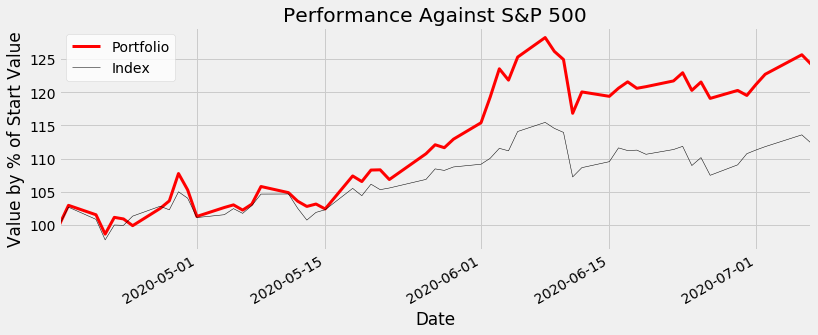

In [45]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211, ylabel='Value by % of Start Value')
portfolio['Std Value'].plot(ax=ax1, color='red', lw=3.)
index_data['Std Value'].plot(ax=ax1, color='black', lw=1/2.)
plt.legend(labels=['Portfolio', 'Index'], facecolor='white')
plt.title('Performance Against S&P 500')
# Get final value of portfolio
portfolio_value = (portfolio.iloc[-1,-3])
# Calc cumulative returns of port and index
cum_port_change = (1+portfolio['returns']).cumprod()
cum_index_change = (1+index_data['returns']).cumprod()
# Annualize
portfolio_cum_ret = (cum_port_change.iloc[-1] **(252/len(portfolio.index))-1)
index_cum_ret = (cum_index_change.iloc[-1] **(252/len(index_data.index))-1)
#print(portfolio_cum_ret)
# Slice most recent date
portfolio_ret= portfolio_cum_ret
index_ret = index_cum_ret

print('\nStarting portfolio value is: $'+ str('{:,.2f}'.format(portfolio.iloc[0,-3])))
print('Current portfolio value is: $'+ str('{:,.2f}'.format(portfolio_value)))
print('\nPortfolio return is: '+ str("{:.2%}".format(portfolio_ret)))
print('Index return is: '+ str("{:.2%}".format(index_ret)))
plt.show()

# Check movement of currencies involved in ETFs against USD

In [28]:
currency_list = ['CNYUSD=X', 'ZARUSD=X', 'IDRUSD=X', 'KRWUSD=X', 'VNDUSD=X', 'TWDUSD=X', 'TRYUSD=X', 'ILSUSD=X', 'SEKUSD=X', 'EURUSD=X', 'BRLUSD=X']
currency_data =  yf.download(currency_list, start_date, end_date)

[*********************100%***********************]  11 of 11 completed


In [29]:
currency_prices = currency_data['Adj Close']
currency_prices

,BRLUSD=X,CNYUSD=X,EURUSD=X,IDRUSD=X,ILSUSD=X,KRWUSD=X,SEKUSD=X,TRYUSD=X,TWDUSD=X,VNDUSD=X,ZARUSD=X
Date,,,,,,,,,,,
2020-04-16,0.190949,0.141513,1.090510,0.000063,0.277327,0.000818,0.099594,0.144990,0.033439,0.000043,0.053601
2020-04-17,0.191172,0.141267,1.085847,0.000064,0.278691,0.000815,0.100013,0.144465,0.033403,0.000043,0.053585
2020-04-20,0.191106,0.141399,1.086697,0.000065,0.278858,0.000823,0.100141,0.144835,0.033294,0.000044,0.053195
2020-04-21,0.188133,0.141395,1.086484,0.000065,0.281698,0.000821,0.099833,0.144080,0.033300,0.000043,0.053264
2020-04-22,0.188147,0.141427,1.085647,0.000065,0.281539,0.000812,0.099071,0.143375,0.033227,0.000043,0.052753
2020-04-23,0.183254,0.141181,1.080964,0.000065,0.282598,0.000812,0.098866,0.143258,0.033273,0.000043,0.052674
2020-04-24,0.180731,0.141539,1.077702,0.000064,0.283622,0.000811,0.099349,0.143761,0.033495,0.000043,0.052351
2020-04-27,0.179449,0.141225,1.082368,0.000065,0.284113,0.000813,0.099671,0.143559,0.033246,0.000043,0.052575
2020-04-28,0.176910,0.141137,1.082485,0.000065,0.285620,0.000819,0.099946,0.143158,0.033430,0.000043,0.053187


In [30]:
change_currency_prices = currency_prices.pct_change()
change_currency_prices = change_currency_prices.fillna(0)
change_currency_prices

,BRLUSD=X,CNYUSD=X,EURUSD=X,IDRUSD=X,ILSUSD=X,KRWUSD=X,SEKUSD=X,TRYUSD=X,TWDUSD=X,VNDUSD=X,ZARUSD=X
Date,,,,,,,,,,,
2020-04-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-17,0.001166,-0.001738,-0.004276,0.020503,0.004919,-0.003334,0.004206,-0.003622,-0.001069,0.000000,-0.000316
2020-04-20,-0.000344,0.000933,0.000782,0.009421,0.000600,0.009364,0.001283,0.002564,-0.003263,0.020376,-0.007272
2020-04-21,-0.015559,-0.000028,-0.000196,0.002985,0.010183,-0.002332,-0.003071,-0.005216,0.000166,-0.019969,0.001305
2020-04-22,0.000075,0.000226,-0.000771,-0.001143,-0.000563,-0.010359,-0.007638,-0.004889,-0.002193,0.000000,-0.009596
2020-04-23,-0.026004,-0.001736,-0.004313,-0.000902,0.003758,-0.000430,-0.002066,-0.000817,0.001397,0.000000,-0.001496
2020-04-24,-0.013772,0.002534,-0.003018,-0.016368,0.003625,-0.000868,0.004888,0.003508,0.006666,0.000000,-0.006136
2020-04-27,-0.007088,-0.002217,0.004330,0.020608,0.001733,0.002399,0.003239,-0.001407,-0.007447,0.000000,0.004285
2020-04-28,-0.014153,-0.000621,0.000108,0.002371,0.005304,0.007069,0.002758,-0.002792,0.005549,0.000000,0.011637


In [31]:
cum_changes = ((1+change_currency_prices).cumprod())-1
#print(cum_changes)
col_names = ['Brazil Real', 'Chinese Yuan', 'Euro', 'Indo Rupiah', 'Israel New Shekel', 'KOR Won', 'Swedish Krona', 'Turkish Lira', 'New Taiwan $', 'Vietnamese Dong', 'SAfrica Rand']
#cum_changes.columns = col_names
#print(cum_changes)

## Plot movements

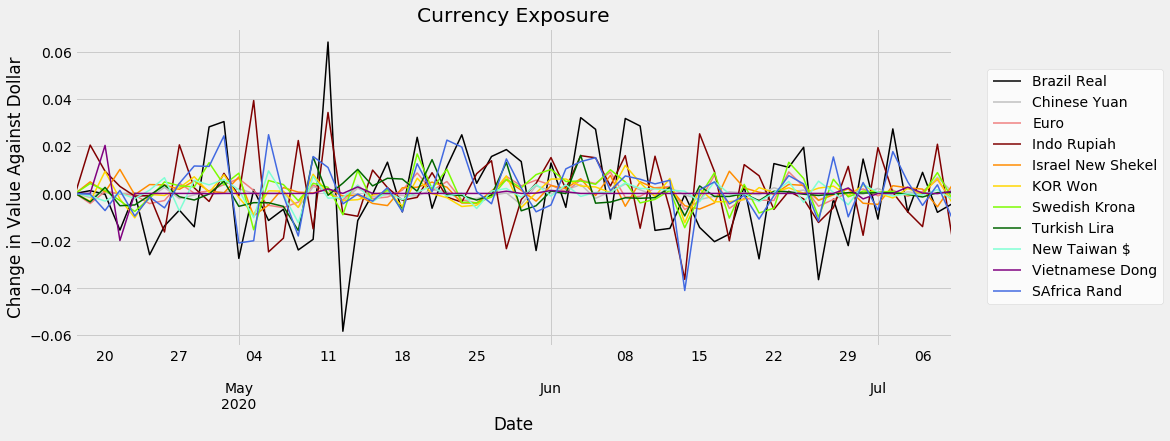


Cumulative Growth/Decline Against Dollar


,BRLUSD=X,CNYUSD=X,EURUSD=X,IDRUSD=X,ILSUSD=X,KRWUSD=X,SEKUSD=X,TRYUSD=X,TWDUSD=X,VNDUSD=X,ZARUSD=X
Date,,,,,,,,,,,
2020-07-08 00:00:00,-2.62%,0.76%,3.39%,9.69%,4.77%,2.25%,8.43%,0.64%,1.45%,1.13%,8.71%


In [32]:
fig2 = plt.figure(figsize=(14,12))
ax2 = fig2.add_subplot(211, ylabel='Change in Value Against Dollar')
change_currency_prices.plot(ax=ax2, lw=3/2., color=['k', 'silver', 'lightcoral', 'maroon', 'darkorange',
                                                 'gold', 'lawngreen', 'darkgreen', 'aquamarine', 'purple', 'royalblue'])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, facecolor='white', labels=col_names)
plt.xlabel('Date')
plt.ylabel('Change in Value Against Dollar')
plt.title('Currency Exposure')
plt.show()
print('\nCumulative Growth/Decline Against Dollar')
#print(cum_changes.iloc[-1:,:])
currency_format = dict(zip(cum_changes.columns, values))
(cum_changes.iloc[-1:,:].style.format(currency_format))